In [37]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

2.4.1


In [38]:
# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

In [39]:
class CustomCallback_epoch(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        print('SAVING INITIAL WEIGHT VALUES')
        weight_history.append(self.model.get_weights())

    def on_epoch_end(self, epoch, logs=None):
        # list of weight tensors
        curr_weight = self.model.get_weights()
        if weight_history:
          weight_change = [curr_weight[i] - weight_history[0][i] for i in range(len(curr_weight))]
          norm_delta = [tf.norm(t, ord=2).numpy() for t in weight_change]
          print('L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES: ', norm_delta)
          weight_history.append(norm_delta) 
        else:
          print('EPOCH', epoch)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_67 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3020 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1135
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [0.0, 0.0, 0.0, 0.1481192]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3012 - accuracy: 0.1119 - val_loss: 2.

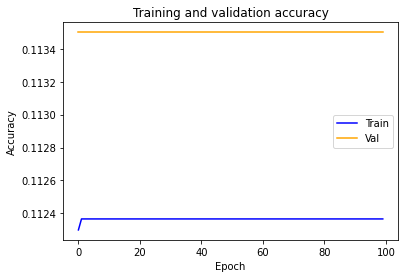

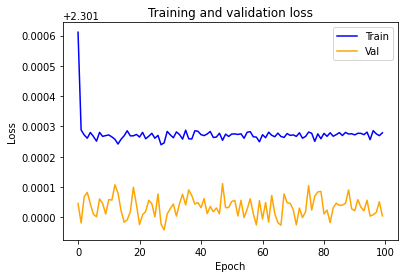

In [50]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_34 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_69 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3019 - accuracy: 0.1109 - val_loss: 2.3011 - val_accuracy: 0.1135
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [1.62556e-09, 5.278604e-11, 1.6267994e-09, 0.13780585]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3015 - acc

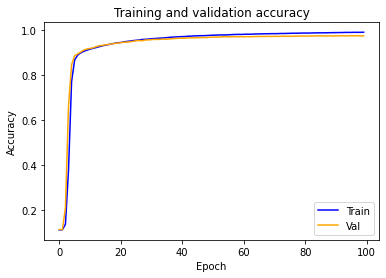

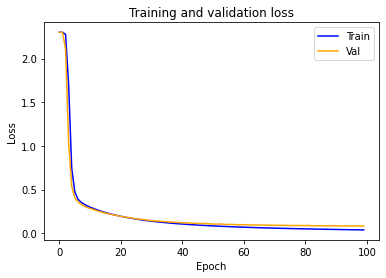

In [51]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=(1/100480000000000), seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_35 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_71 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0389 - accuracy: 0.3297 - val_loss: 0.6094 - val_accuracy: 0.8350
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [3.2707434, 0.20929427, 3.2726462, 0.3784161]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5356 - accuracy: 0.

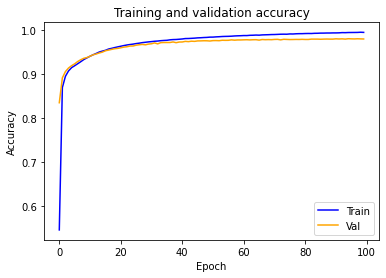

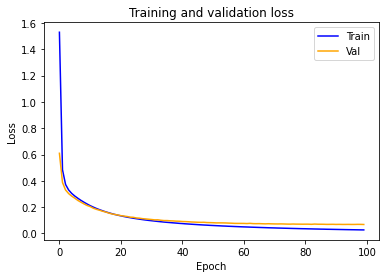

In [52]:
# this initializer uses 1/num_parameters as variance, should trigger active training
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=(1/100480)**0.5, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_36 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_73 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2794 - accuracy: 0.1341 - val_loss: 1.2728 - val_accuracy: 0.6666
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [1.958931, 0.11915058, 1.9642948, 0.4333035]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9356 - accuracy: 0.7

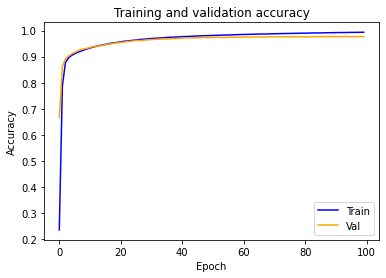

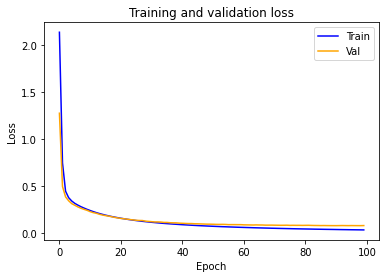

In [53]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_75 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9655 - accuracy: 0.4090 - val_loss: 0.5725 - val_accuracy: 0.8443
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [3.3681796, 0.21521485, 3.3635871, 0.36785233]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5080 - accuracy: 0

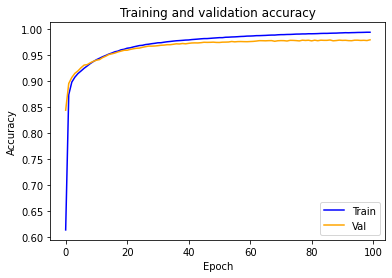

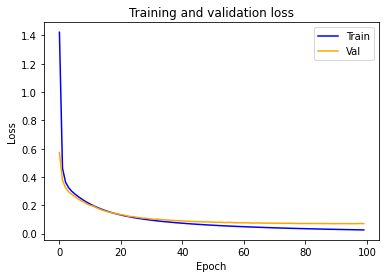

In [54]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.005, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_41 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_83 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.7037 - val_loss: 0.3673 - val_accuracy: 0.8979
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [3.1871548, 0.26799092, 2.6657865, 0.16988613]
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3730 - accuracy: 0

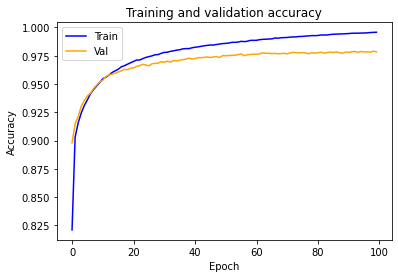

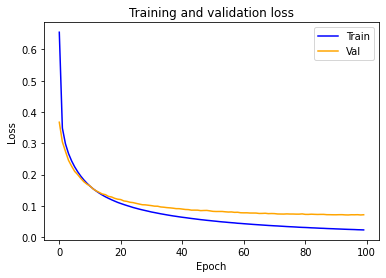

In [58]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_38 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_77 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 32.4222 - accuracy: 0.6439 - val_loss: 6.8119 - val_accuracy: 0.8561
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [19.11565, 1.6693938, 16.664206, 0.07547565]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 6.4733 - accuracy: 0.

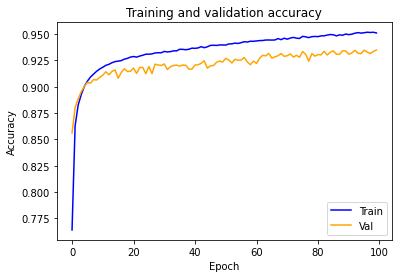

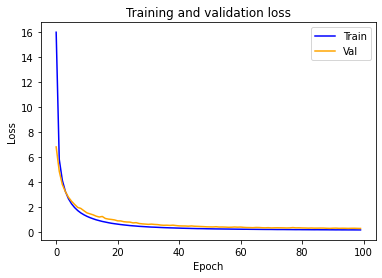

In [55]:
# this initializer uses sqrt(2) as stddev, much higher than default, should trigger lazy training
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.414, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_lazy = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_lazy.summary())

model_lazy.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_lazy.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_lazy.predict(x_test), axis=1)))

lazy_weight_history = weight_history[1:]

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_42 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_85 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 64.5476 - accuracy: 0.6442 - val_loss: 13.9913 - val_accuracy: 0.8557
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [27.149189, 2.4281332, 23.454567, 0.07263037]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 12.7103 - accuracy:

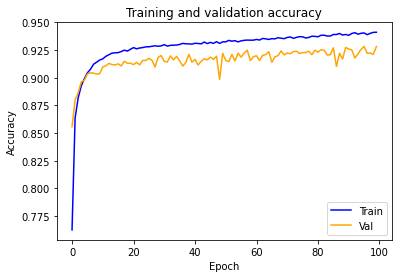

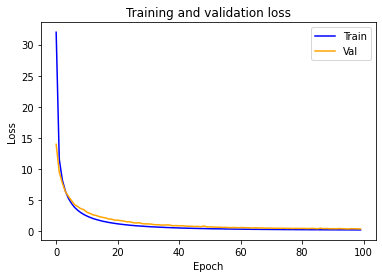

In [59]:
# this initializer uses sqrt(2) as stddev, much higher than default, should trigger lazy training
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=2, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_lazy = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_lazy.summary())

model_lazy.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_lazy.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_lazy.predict(x_test), axis=1)))

lazy_weight_history = weight_history[1:]

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_39 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_79 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 403.3024 - accuracy: 0.6428 - val_loss: 85.4251 - val_accuracy: 0.8557
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [67.95353, 6.0587063, 58.684887, 0.07194459]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 79.1751 - accuracy:

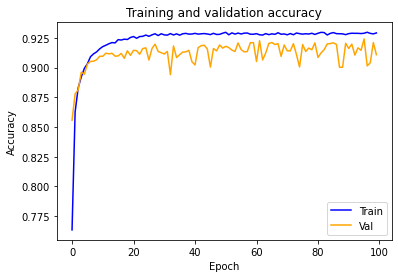

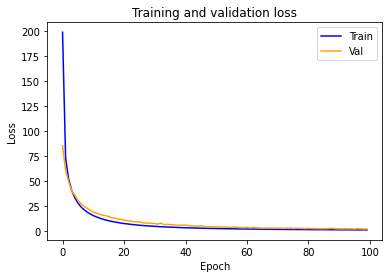

In [56]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=5, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_lazy = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_lazy.summary())

model_lazy.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_lazy.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_lazy.predict(x_test), axis=1)))

lazy_weight_history = weight_history[1:]

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_40 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_81 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1668760.0752 - accuracy: 0.6229 - val_loss: 325444.4375 - val_accuracy: 0.8383
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [4330.1143, 432.36133, 3883.015, 0.14306146]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 302940.1088

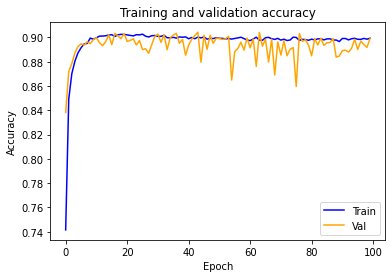

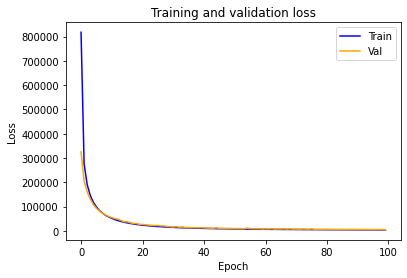

In [57]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=(100480)**0.5)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9605 - accuracy: 0.8027 - val_loss: 0.3535 - val_accuracy: 0.9048
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [3.6578248, 0.3343442, 1.5999465, 0.168561]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3541 - accuracy: 0.90

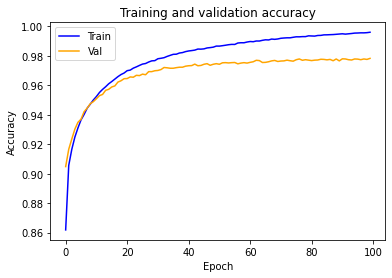

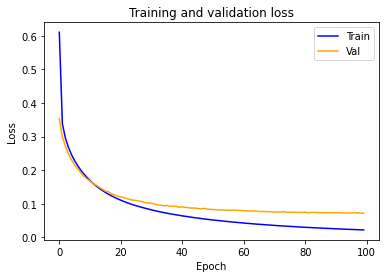

In [48]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.005, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_lazy = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax')
])

weight_history = []

print(model_lazy.summary())

model_lazy.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_lazy.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_lazy.predict(x_test), axis=1)))

lazy_weight_history = weight_history[1:]

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_65 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 21.4482 - accuracy: 0.7422 - val_loss: 10.4911 - val_accuracy: 0.8202
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [4.1713524, 0.63005805, 10.360986, 0.033409365]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 9.6324 - accuracy

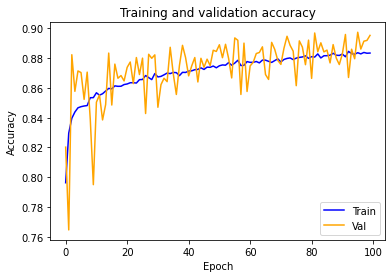

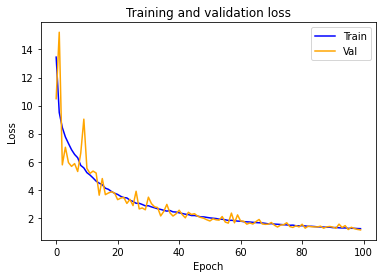

In [49]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=5, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_lazy = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax')
])

weight_history = []

print(model_lazy.summary())

model_lazy.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_lazy.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_lazy.predict(x_test), axis=1)))

lazy_weight_history = weight_history[1:]